# Reading
> I really like this article on Machine Learning. Please go through this article before attempting the exercise
[Machine Learning basics](https://emerj.com/ai-glossary-terms/what-is-machine-learning/)

# Linear Regression with Python

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

**Let's get started!**
## Check out the data
We've been able to get some data from your neighbor for housing prices as a csv set, let's get our environment ready with the libraries we'll need and then import the data!
### Import Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Check out the Data

In [42]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [2]:
# import 'Pricing' data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [10]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [13]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# EDA

Let's create some simple plots to check out the data!

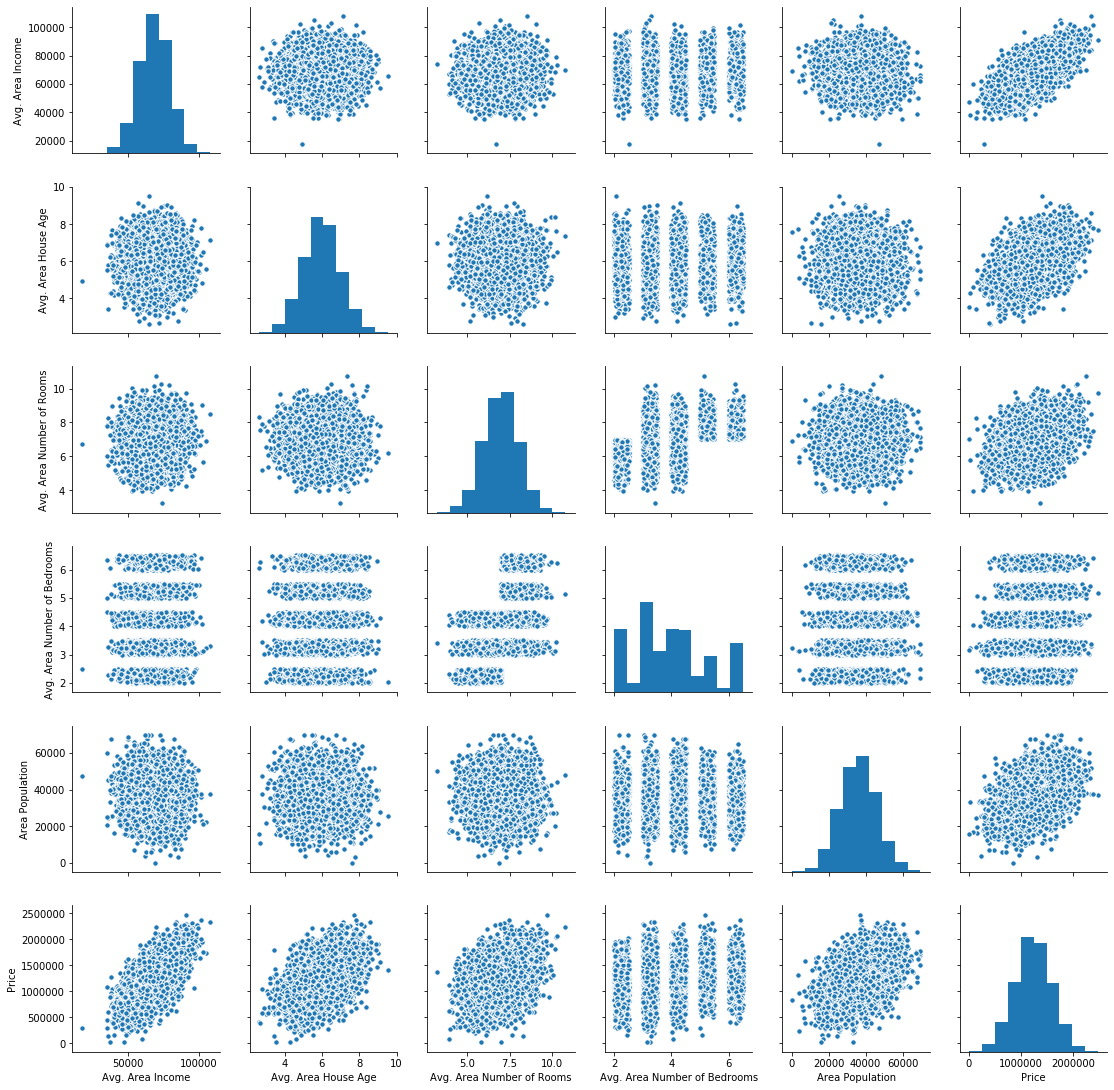

In [27]:
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, s=30, edgecolors= "white");
plt.show()


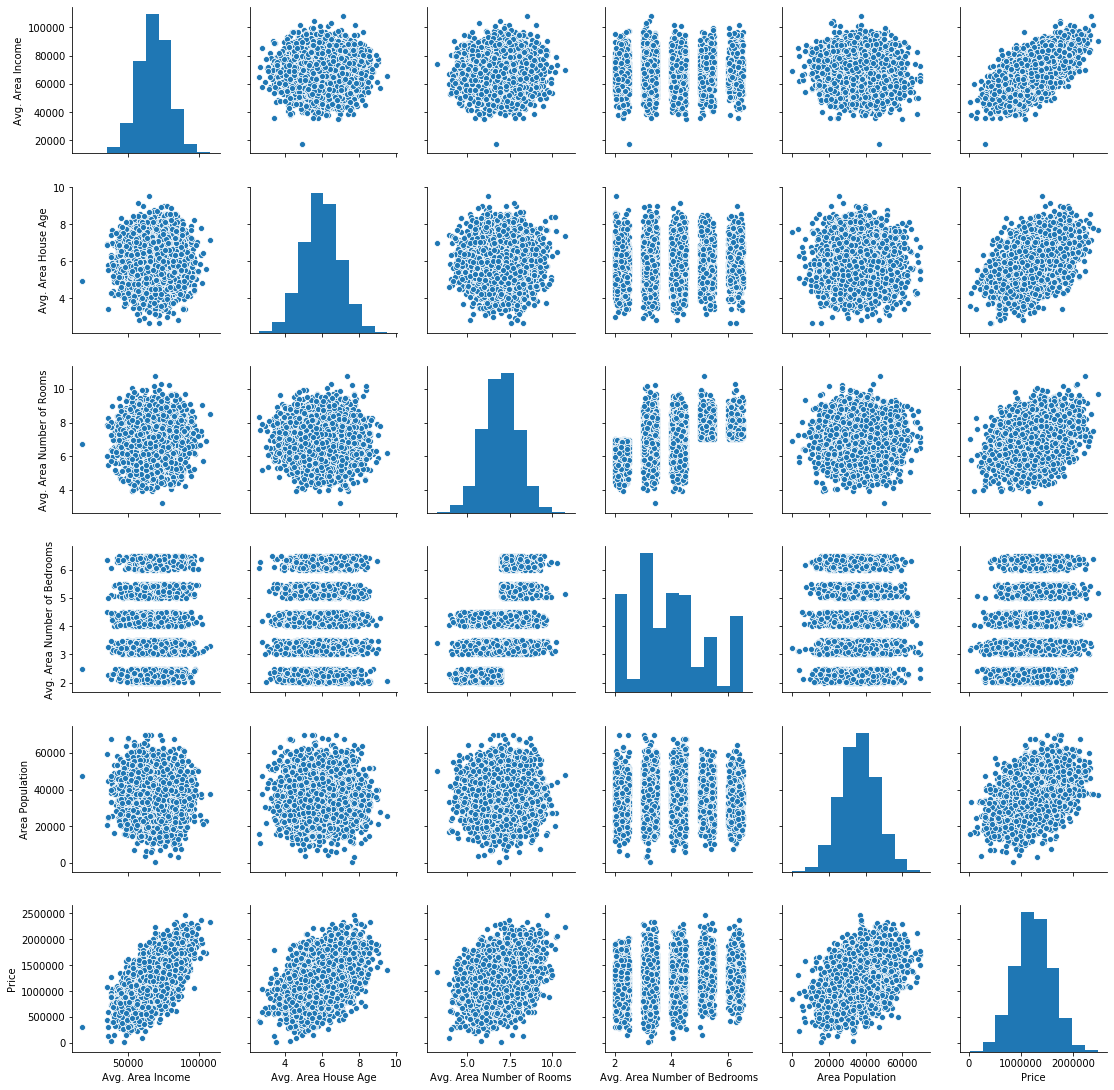

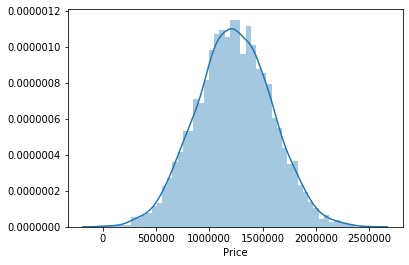

In [32]:
sns.distplot(df['Price'],bins=50)

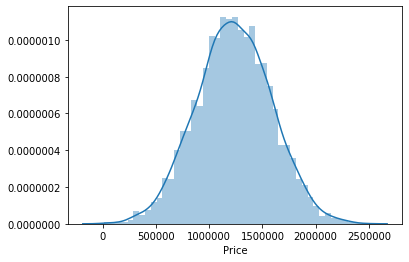

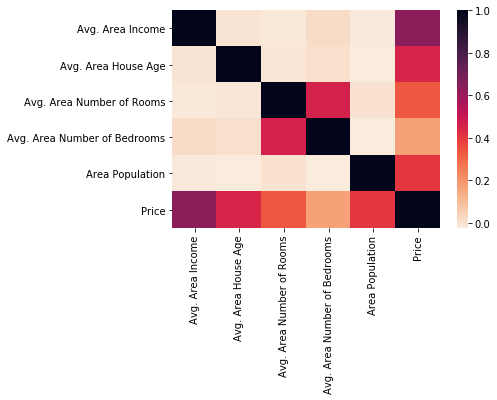

In [37]:
cmap = sns.cm.rocket_r
sns.heatmap(df.corr(), cmap = cmap)

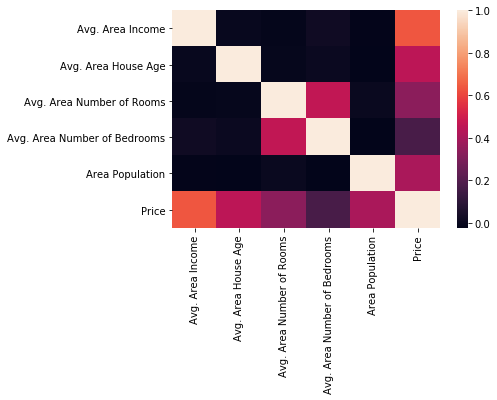

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [43]:
df = df.drop('Address',1) 

In [49]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]
y = df['Price']

In [58]:
# import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [59]:
# default split is 75% for training and 25% for testing (we changed it for 80 /20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 5)
(1000, 5)
(4000,)
(1000,)


In [60]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

-2637185.640075891
[2.16667346e+01 1.64990052e+05 1.20784238e+05 1.54252468e+03
 1.51503697e+01]


In [62]:
# pair the feature names with the coefficients
# hard to remember the order, we so we python's zip function to pair the feature names with the coefficients
zip(X, linreg.coef_)

In [63]:
output = pd.DataFrame(linreg.coef_)
output

,0
0,21.666735
1,164990.051829
2,120784.238317
3,1542.524676
4,15.150370


In [85]:
coeff_df = pd.DataFrame(linreg.coef_,X.columns,columns=['Coefficient']) 
coeff_df

,Coefficient
Avg. Area Income,21.666735
Avg. Area House Age,164990.051829
Avg. Area Number of Rooms,120784.238317
Avg. Area Number of Bedrooms,1542.524676
Area Population,15.150370


In [76]:
y_pred = linreg.predict(X_test)

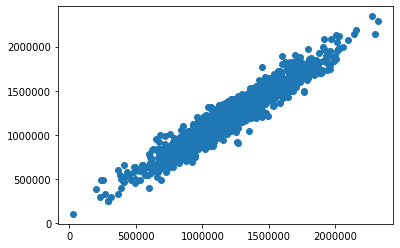

In [77]:
plt.scatter(y_test,y_pred)

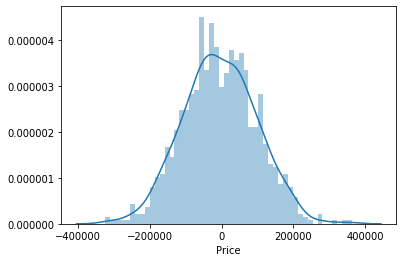

In [79]:
sns.distplot((y_test-y_pred),bins=50); 

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

## Creating and Training the Model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [16]:
# print the intercept

-2640159.796851911


In [17]:
# make a df of coefficient 

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


# Interpret the coefficients

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

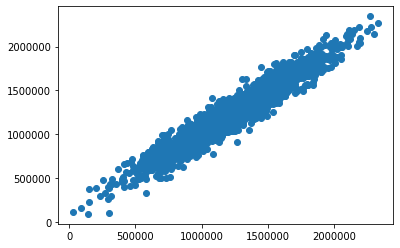

**Residual Histogram**

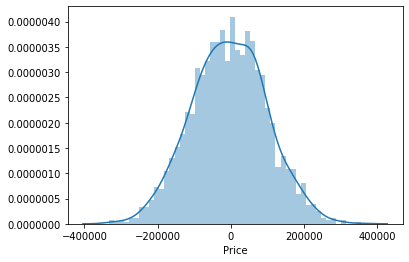

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [72]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [73]:
# calculate MAE by hand
print((10 + 0 + 20 + 10) / 4)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


In [74]:
# calculate MSE by hand
import numpy as np
print((10**2 + 0**2 + 20**2 + 10**2) / 4)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


In [75]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt(((10**2 + 0**2 + 20**2 + 10**2) / 4)))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


In [81]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 82494.73770125466
MSE: 10543597313.625553
RMSE: 102682.02040097163


In [22]:
# Print MAE, MSE, RMSE

MAE: 82288.22251914957
MSE: 10460958907.209501
RMSE: 102278.82922291153


# Some important concepts

- What is Supervised, unsupervised, Semi-supervised and reinforcement machine learning algorithms?
**List out examples for each of the category**

- What is the difference between Machine Learning and Data Science?

- What is Deep learning and how does it differ from Machine Learning?

## Great Job!